# Music Genre Classification 

In [2]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import os

import librosa.display
import deeplake

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Load dataset

In [3]:
#ds = deeplake.load("hub://activeloop/gtzan-genre")

#temporary list for the input data
data = []

#list to append all the labels
Y = []

base_path = '../music_genre_classification/Data/genres_original'

#looping through all label directories
for label in tqdm(os.listdir(base_path)):
    file_path = base_path + '/' + label
    
    #looping through each file in the directory
    for pth in os.listdir(file_path):
        
        try:
            final_path = file_path + '/' + pth

            #loading original file
            audio, sr = librosa.load(final_path, duration = 28)
            
            #appending data to a list
            data.append(audio)
          

            #appending labels to the label list
            Y.append(label)
            
        except:
            print("Error in file", pth)
            pass
        
#converting list to a numpy array
X = np.stack(data)

 50%|█████     | 5/10 [00:02<00:02,  2.29it/s]C:\Users\ingvilcf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 60%|██████    | 6/10 [00:02<00:01,  2.33it/s]

Error in file jazz.00054.wav


100%|██████████| 10/10 [00:03<00:00,  2.54it/s]


## Split dataset

In [4]:
audio_train, audio_test, y_train, y_test = train_test_split(\
     X, Y, test_size=0.20, random_state=6)

## Augment data

In [5]:
add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=0.5),
])

In [6]:
#setting melspec features
n_mels = 128
hop_length = 512
n_fft = 1024

def get_melspec(audio, sr = sr, n_fft = n_fft, hop_length = hop_length, n_mels = n_mels):
    #calculate the melspectogram of the provided audio wave
    S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    return S

## Augment training set

In [7]:
#temporary list for the input data
X_train = []

#list to append all the labels
Y_train = []

#looping through train data to create melspec and augment data
for i, dat in tqdm(enumerate(audio_train)):
        
    try:

        #adding noise to the file
        noisy_audio = add_noise(dat ,sr)
        #changing pitch of the audio
        pitch_audio = pitch_shift(dat, sr)

        #generate melspec for original and augmented files
        mel = get_melspec(dat)
        noise_mel = get_melspec(noisy_audio)
        pitch_mel = get_melspec(pitch_audio)

        #appending augmented data to original training data
        X_train.append(mel)
        Y_train.append(y_train[i])
        X_train.append(noise_mel)
        Y_train.append(y_train[i])
        X_train.append(pitch_mel)
        Y_train.append(y_train[i])


    except Exception as e:
        print("Error in file:", pth)
        print("Error:", e)

0it [00:00, ?it/s]C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[0.35791016 0.3979187  0.32870483 ... 0.19400024 0.21530151 0.21347046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[0.35818538 0.39922795 0.32494196 ... 0.1996894  0.20923947 0.2022023 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[0.3441356  0.4139675  0.33583298 ... 0.0148829  0.00911065 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an erro

## Extract mel-spec features from test data

In [8]:
#temporary list for the input data
X_test = []

#list to append all the labels
Y_test = []

#looping through train data to create melspec and augment data
for i, dat in tqdm(enumerate(audio_test)):
        
    try:
        #generate melspec for original and augmented files
        mel = get_melspec(dat)
       
        #Appending test melspec to list
        X_test.append(mel)
        Y_test.append(y_test[i])
        

    except Exception as e:
        print("Error in file:", pth)
        print("Error:", e)

0it [00:00, ?it/s]C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[-0.21136475 -0.39596558 -0.3473816  ... -0.20297241 -0.22109985
 -0.23660278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[-0.07327271 -0.1105957  -0.10214233 ...  0.16317749  0.22384644
  0.22766113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
C:\Users\ingvilcf\AppData\Local\Temp\ipykernel_21096\151441632.py:8: FutureWarning: Pass y=[-0.07510376 -0.09121704 -0.05618286 ... -0.07025146 -0.08276367
 -0.07446289] as keyword args. From version 0.10 passing these as positional arguments w

In [9]:
#converting the test and train data to numpy array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [10]:
# Encode target values to numbers
encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

# Model

In [13]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU
from keras.callbacks import Callback, EarlyStopping

#Initiating the model as Sequential
model = Sequential()

#Adding the CNN layers along with some drop outs and maxpooling
model.add(Conv2D(64, 2, activation = 'relu', input_shape = (X_train.shape[1:])))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.3))

model.add(Conv2D(512, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (6,6)))
model.add(Dropout(0.3))

#flattening the data to be passed to a dense layer
model.add(Flatten())

#Adding the dense layers
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

#final output layer with 10 predictions to be made
model.add(Dense(10, activation = 'softmax'))

'''
Optimizer = Adam
Loss = Sparse Categorical CrossEntropy
'''
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping if no improvement for 2 iterations
callback = EarlyStopping(monitor='loss', patience=2)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 127, 1205, 64)     320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 602, 64)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 602, 64)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 601, 128)      32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 300, 128)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 31, 300, 128)     

## Training

In [14]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),callbacks=[callback],epochs=20)
print(len(history.history['loss']))

Epoch 1/20
10/75 [===>..........................] - ETA: 4:47 - loss: 26.4389 - accuracy: 0.1125

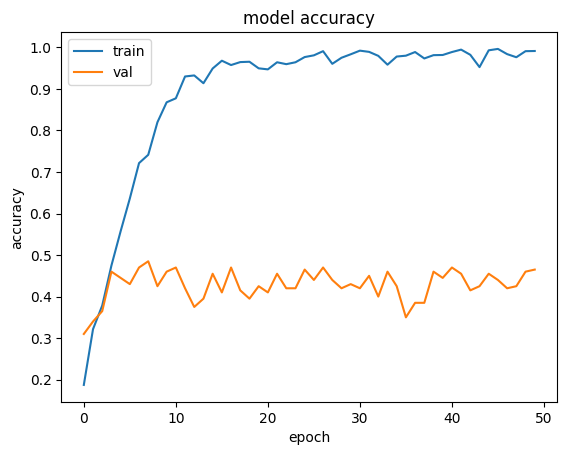

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()

In [47]:
plt.plot(history.history['error'])
plt.plot(history.history['val_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()

KeyError: 'error'

In [46]:
# Save the model
model.save('cnn_1.h5')